<a href="https://colab.research.google.com/github/danthunguyenh/baitap/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd

In [ ]:
import os
print(os.listdir("/content/mushroom"))

['mushroom_json.json', 'train', '.ipynb_checkpoints', 'mushroom_csv.csv', 'validation_report.json']


Dùng thư mục hình thay thế cho file Json

In [ ]:
path = '/content/mushroom/train/'
def get_images():
    img_dict = {}
    for i in os.listdir("/content/mushroom/train"):
        img_dict[i] = cv2.imread(str(path)+i+'.jpg')
    return img_dict
# Reading images from the dataset and saving them in a dictionary
img_dict = get_images() 
print(len(img_dict))

21


In [ ]:
def resize(img):
    desired_size = 320

    old_size = img.shape[:2]  
    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    img = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_img

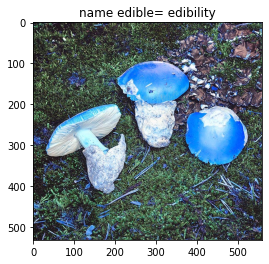

In [ ]:
import matplotlib.pyplot as plt
path = '/content/mushroom/train/'
def print_image(index):
    name = "name"
    edibility = "edibility"
    plt.imshow(cv2.imread(str(path)+str(index)+'.jpg'))
    plt.title(name + " edible= " + edibility)
    plt.show()
    
print_image(10)
    

In [ ]:
mushroom_info.edibility.value_counts() #không có dữ liệu

In [ ]:
labels = mushroom_info.edibility.isin(("edible", "edible and good", "edible and excellent"))
labels = 1*labels
X = []
y = []
for i in range(len(labels)):
    y.append(labels[i])
    X.append(img_dict[i])

X = np.stack(X)
y = pd.Series(y)

In [ ]:
flat = X.flatten().reshape(536,307200)

In [ ]:
    return x * (x>0)#1 / (1 + np.exp(-x))

def MPInverse(h):
    return np.linalg.pinv(h)

no_of_features = 307200
no_of_hidden_nodes1 = 200
no_of_output = 1

input_data = flat

output = y
np.random.seed(2018)
base_bias = 2* np.random.random((1, no_of_hidden_nodes1)) -1
weight01 = 2 * np.random.random((no_of_features, no_of_hidden_nodes1)) - 1


input_layer = input_data
bias = np.array([base_bias[0],]*input_data.shape[0])
H = activation(np.dot(input_layer, weight01) + bias)
B = np.dot(MPInverse(H),output)
print("Model Trained")

In [ ]:
images = []
ground_truth = np.loadtxt("../input/mushroom/test_img/gt.txt")
for file in sorted(os.listdir('../input/mushroom/test_img')):
    if file.endswith('.jpg'):
        print(file)
        img = cv2.imread('../input/mushroom/test_img/'+file,-1)
        if img is not None:
            images.append(img)

print("Ground truth")
print(ground_truth)

In [ ]:
def print_image2(img,prediction,actual):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    title = "P(edible)= " + str(prediction) + " Actual = " + str(actual)
    plt.title(title)
    plt.show()

In [ ]:
def predict(test_input,g_t):
    test_img = test_input.flatten().reshape(1,307200)
    bias_test = np.array([base_bias[0],]*test_img.shape[0])
    
    H_test = activation(np.dot(test_img, weight01) + bias_test)
    T_test = activation(np.dot(H_test,B))
    
    print_image2(test_input,T_test,g_t)

In [ ]:
for test,g_t in zip(images,ground_truth):
    test = resize(test)
    predict(test,g_t)